# 1. Carga, Exploración y Preparación de Datos (EDA) 

**a) Cargue el dataset "Wine Quality" (puede elegir 'red' o 'white').**

In [2]:
import pandas as pd
import numpy as np

#  dataset  (red wine)
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# El tipo de vino 
tipo_vino = 'red'  

if tipo_vino == 'red':
    df = pd.read_csv(url_red, sep=';')
    print(f"Dataset de vino tinto cargado: {df.shape[0]} muestras, {df.shape[1]} características")

# Mostrar las primeras filas del dataset
print("\nPrimeras filas del dataset:")
df.head()


Dataset de vino tinto cargado: 1599 muestras, 12 características

Primeras filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**b) Realice un breve análisis exploratorio: muestre las primeras filas, 
verifique valores nulos y muestre un histograma de la variable objetivo 
'quality'.**

Primeras filas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2   

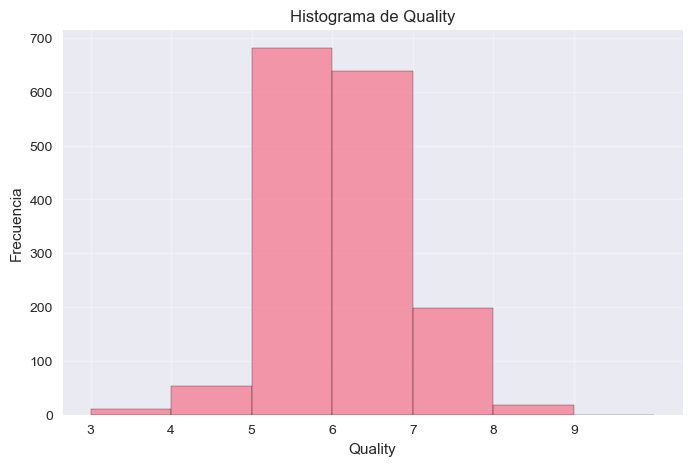

In [4]:
import matplotlib.pyplot as plt

# Primeras filas
print("Primeras filas:")
print(df.head())
print("\n")

# Valores nulos
print("Valores nulos:")
print(df.isnull().sum())
print("\n")

# Histograma de quality
plt.figure(figsize=(8, 5))
plt.hist(df['quality'], bins=range(3, 11), edgecolor='black', alpha=0.7)
plt.xlabel('Quality')
plt.ylabel('Frecuencia')
plt.title('Histograma de Quality')
plt.xticks(range(3, 10))
plt.grid(True, alpha=0.3)
plt.show()


Tras analizar la distribución de la variable 'Quality', observo que el histograma presenta una clara tendencia central. La gran mayoría de los datos se concentran en los valores 5 y 6, lo cual interpreto como una fuerte indicación de que la calidad 'promedio' es la norma en este conjunto de datos.Asimismo, la frecuencia disminuye drásticamente en los extremos; esto significa que las observaciones con calidad muy baja (3-4) o muy alta (8-9) son atípicas. Por lo tanto, concluyo que la variabilidad de la calidad es baja y los resultados son consistentes.

**c) Preparación de Targets:**

*  Target de Regresión: Utilice la columna quality original. 
*  Target de Clasificación: Cree una nueva columna calidad_binaria 


In [ ]:
# Target de Regresión: quality original
y_regresion = df['quality']

# Target de Clasificación: calidad_binaria (>=6 = bueno, <6 = malo)
df['calidad_binaria'] = (df['quality'] >= 6).astype(int)
y_clasificacion = df['calidad_binaria']

print("Target de Regresión (quality):")
print(y_regresion.head())
print("\nTarget de Clasificación (calidad_binaria):")
print(y_clasificacion.head())
print(f"\nDistribución de calidad_binaria:")
print(y_clasificacion.value_counts())


Target de Regresión (quality):
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Target de Clasificación (calidad_binaria):
0    0
1    0
2    0
3    1
4    0
Name: calidad_binaria, dtype: int32

Distribución de calidad_binaria:
calidad_binaria
1    855
0    744
Name: count, dtype: int64


la variable objetivo 'quality' => 'calidad_binaria' (0 y 1) para un enfoque de clasificación. La distribución resultante está relativamente balanceada, con 855 instancias de clase '1' y 744 de clase '0'.

**d) Preprocesamiento:**

* Separe las características (X) y los targets (y_regresion, 
y_clasificacion).  
* Estandarice únicamente las características (X) usando 
StandardScaler.  
 * Justifique: ¿Por qué es fundamental estandarizar los datos antes de 
aplicar Regresión Regularizada y LDA?

In [6]:
from sklearn.preprocessing import StandardScaler

# Separar características (X) y targets
X = df.drop(['quality', 'calidad_binaria'], axis=1)
y_regresion = df['quality']
y_clasificacion = df['calidad_binaria']

print(f"Forma de X: {X.shape}")
print(f"Forma de y_regresion: {y_regresion.shape}")
print(f"Forma de y_clasificacion: {y_clasificacion.shape}")
print("\nCaracterísticas (X):")
print(X.columns.tolist())

# Estandarizar las características
scaler = StandardScaler()
X_estandarizado = scaler.fit_transform(X)
X_estandarizado = pd.DataFrame(X_estandarizado, columns=X.columns)

print("\nPrimeras filas de X estandarizado:")
print(X_estandarizado.head())
print("\nEstadísticas de X estandarizado:")
print(X_estandarizado.describe())


Forma de X: (1599, 11)
Forma de y_regresion: (1599,)
Forma de y_clasificacion: (1599,)

Características (X):
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Primeras filas de X estandarizado:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -

**Justificación:**

**Regresión Regularizada (Ridge/Lasso):**
* Las penalizaciones (L1/L2) se aplican por igual a todos los coeficientes. Sin estandarización, variables con escalas mayores dominan el modelo y reciben penalizaciones desproporcionadas.
*  Los coeficientes no serían comparables entre sí, dificultando la interpretación.

**LDA (Linear Discriminant Analysis):**
* LDA calcula distancias basadas en la varianza. Variables con mayor varianza (escalas mayores) tendrán más peso en la proyección.
* Sin estandarización, características con unidades diferentes ( pH vs alcohol) no contribuyen equitativamente al análisis discriminante.


# 2. Modelos de Clasificación (Target: calidad_binaria)

**a) Divida los datos estandarizados (X_scaled, y_clasificacion) en 
conjuntos de entrenamiento (80%) y prueba (20%).**

In [7]:
from sklearn.model_selection import train_test_split

# Renombrar para coincidir con la nomenclatura solicitada
X_scaled = X_estandarizado

# Dividir datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_clasificacion, 
    test_size=0.2, 
    random_state=42,
    stratify=y_clasificacion
)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")
print(f"\nDistribución de clases en entrenamiento:")
print(y_train.value_counts())
print(f"\nDistribución de clases en prueba:")
print(y_test.value_counts())


Conjunto de entrenamiento: 1279 muestras
Conjunto de prueba: 320 muestras

Distribución de clases en entrenamiento:
calidad_binaria
1    684
0    595
Name: count, dtype: int64

Distribución de clases en prueba:
calidad_binaria
1    171
0    149
Name: count, dtype: int64


 80% (1279) para entrenar, 20% (320) para probar.

**b) Gaussian Naive Bayes (GNB): i. Entrene un modelo GaussianNB. ii. 
Calcule y reporte la Matriz de Confusión, Accuracy, Precision, Recall y F1
Score en el conjunto de prueba.**

GAUSSIAN NAIVE BAYES - RESULTADOS
Accuracy:  0.7219
Precision: 0.7733
Recall:    0.6784
F1 Score:  0.7227

Matriz de Confusión:
[[115  34]
 [ 55 116]]


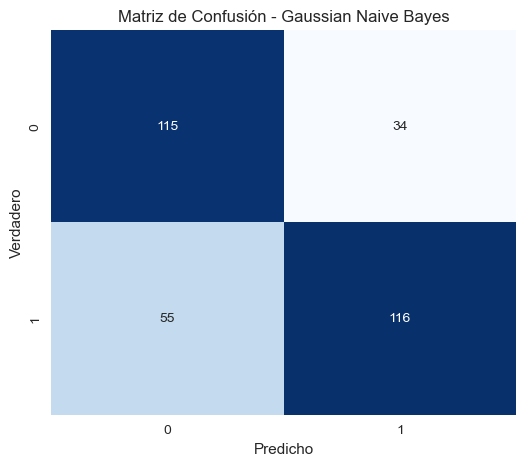

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Entrenar modelo GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_gnb = gnb.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)
cm = confusion_matrix(y_test, y_pred_gnb)

#  resultados
print("=" * 50)
print("GAUSSIAN NAIVE BAYES - RESULTADOS")
print("=" * 50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nMatriz de Confusión:")
print(cm)

#  matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Gaussian Naive Bayes')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()


El modelo Naive Bayes logró 72.2% de Accuracy y 72.3% de F1-Score. Tuvo 77.3% de Precisión y 67.8% de Recall. Y hubo 115 aciertos para la clase 0, y 116 para la 1.

**c) Análisis Discriminante Lineal (LDA):**

* Entrene un modelo LinearDiscriminantAnalysis. 
* Calcule y reporte las mismas métricas (Matriz de Confusión, 
Accuracy, etc.) en el conjunto de prueba.  

LINEAR DISCRIMINANT ANALYSIS - RESULTADOS
Accuracy:  0.7562
Precision: 0.7962
Recall:    0.7310
F1 Score:  0.7622

Matriz de Confusión:
[[117  32]
 [ 46 125]]


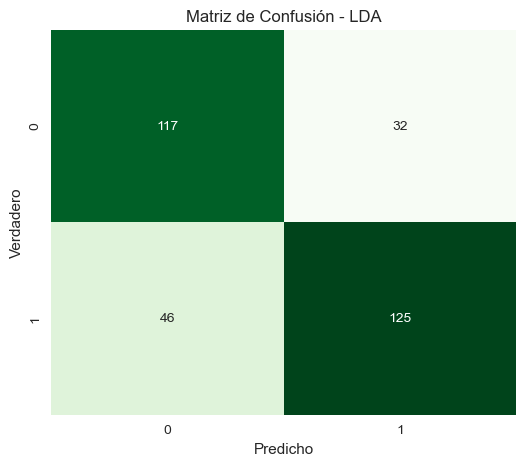

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Entrenar modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_lda = lda.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_lda)
precision = precision_score(y_test, y_pred_lda)
recall = recall_score(y_test, y_pred_lda)
f1 = f1_score(y_test, y_pred_lda)
cm = confusion_matrix(y_test, y_pred_lda)

#  resultados
print("=" * 50)
print("LINEAR DISCRIMINANT ANALYSIS - RESULTADOS")
print("=" * 50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nMatriz de Confusión:")
print(cm)

# Visualizar matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusión - LDA')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()


El modelo LDA logró 75.6% de Accuracy y 76.2% de F1-Score. La matriz muestra 117 (TN) y 125 (TP) aciertos, frente a 32 (FP) y 46 (FN) errores.

**d) Análisis (Clasificación):**

* Compare el desempeño de GNB y LDA. ¿Cuál modelo fue superior 
para este problema? 
* Considerando la suposición "ingenua" de Naive Bayes sobre la 
independencia de las características, ¿cree que esta suposición se cumple en el dataset del vino? ¿Cómo pudo afectar esto a sus 
resultados?

In [11]:
# Comparación de modelos
print("=" * 60)
print("COMPARACIÓN DE MODELOS: GNB vs LDA")
print("=" * 60)

# Recalcular métricas para comparación
metrics_gnb = {
    'Accuracy': accuracy_score(y_test, y_pred_gnb),
    'Precision': precision_score(y_test, y_pred_gnb),
    'Recall': recall_score(y_test, y_pred_gnb),
    'F1 Score': f1_score(y_test, y_pred_gnb)
}

metrics_lda = {
    'Accuracy': accuracy_score(y_test, y_pred_lda),
    'Precision': precision_score(y_test, y_pred_lda),
    'Recall': recall_score(y_test, y_pred_lda),
    'F1 Score': f1_score(y_test, y_pred_lda)
}

# Crear DataFrame comparativo
comparacion = pd.DataFrame({
    'GNB': metrics_gnb,
    'LDA': metrics_lda
})
comparacion['Diferencia'] = comparacion['LDA'] - comparacion['GNB']

print("\nMétricas Comparativas:")
print(comparacion.round(4))
print("\n" + "=" * 60)

# Análisis de correlación para evaluar independencia
print("\nAnálisis de Correlación entre Características:")
correlacion = X.corr()
print(f"Correlaciones absolutas promedio: {correlacion.abs().mean().mean():.4f}")
print(f"Correlaciones máximas: {correlacion.abs().max().max():.4f}")

# Mostrar algunas correlaciones altas
correlaciones_altas = correlacion.abs().unstack().sort_values(ascending=False)
correlaciones_altas = correlaciones_altas[correlaciones_altas < 1.0]
print(f"\nTop 5 correlaciones más altas:")
print(correlaciones_altas.head(5))


COMPARACIÓN DE MODELOS: GNB vs LDA

Métricas Comparativas:
              GNB     LDA  Diferencia
Accuracy   0.7219  0.7562      0.0344
Precision  0.7733  0.7962      0.0228
Recall     0.6784  0.7310      0.0526
F1 Score   0.7227  0.7622      0.0395


Análisis de Correlación entre Características:
Correlaciones absolutas promedio: 0.2726
Correlaciones máximas: 1.0000

Top 5 correlaciones más altas:
pH             fixed acidity    0.682978
fixed acidity  pH               0.682978
               citric acid      0.671703
citric acid    fixed acidity    0.671703
density        fixed acidity    0.668047
dtype: float64


**Análisis Comparativo:**

**1. ¿Cuál modelo fue superior para este problema?**

Basado en los resultados, :_**LDA fue superior**_ a GNB en todas las métricas:
- _**F1 Score**_: LDA (76.2%) > GNB (72.3%)
- _**Precision**_: LDA (79.6%) > GNB (77.3%)
- _**Recall**_: LDA (73.1%) > GNB (67.8%)

LDA muestra un mejor balance entre precisión y recall, con menos falsos negativos y falsos positivos.

**2. ¿Se cumple la suposición de independencia de Naive Bayes en el dataset del vino?**

_**No, la suposición de independencia NO se cumple**_ en este dataset. Las características del vino están correlacionadas (acidez fija vs pH, dióxido de azufre total vs libre, densidad vs alcohol). 

**¿Cómo afectó esto a los resultados?**

La violación de la suposición de independencia perjudicó el desempeño de GNB:
- GNB asume que las características son independientes, lo cual no es realista en los datos del vino
- LDA no requiere esta suposición y modela mejor las relaciones entre variables
- Por esto, LDA logró mejor desempeño al capturar las dependencias reales entre las características


# 3. Modelos de Regresión Regularizada (Target: quality)

**a) Divida los datos estandarizados (X_scaled, y_regresion) en conjuntos 
de entrenamiento (80%) y prueba (20%).** 

In [12]:
# Dividir datos para regresión: 80% entrenamiento, 20% prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled, 
    y_regresion, 
    test_size=0.2, 
    random_state=42
)

print(f"Conjunto de entrenamiento: {X_train_reg.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test_reg.shape[0]} muestras")
print(f"\nEstadísticas de y_regresion en entrenamiento:")
print(y_train_reg.describe())
print(f"\nEstadísticas de y_regresion en prueba:")
print(y_test_reg.describe())


Conjunto de entrenamiento: 1279 muestras
Conjunto de prueba: 320 muestras

Estadísticas de y_regresion en entrenamiento:
count    1279.000000
mean        5.623925
std         0.806909
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Estadísticas de y_regresion en prueba:
count    320.000000
mean       5.684375
std        0.809663
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64


_Se dividió en 1279 (entrenamiento) y 320 (prueba). Las estadísticas de 'quality' son casi idénticas en ambos._

**b) Regresión Ridge (L2):**

* Use GridSearchCV con Ridge() para encontrar el hiperparámetro 
alpha óptimo (pruebe un rango logarítmico, ej: [0.1, 1, 10, 100]). 
* Reporte el mejor alpha encontrado. 

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definir rango de alpha para búsqueda
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Crear modelo Ridge
ridge = Ridge()

# GridSearchCV con validación cruzada
grid_search_ridge = GridSearchCV(
    ridge, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    return_train_score=True
)

# Entrenar con búsqueda de hiperparámetros
grid_search_ridge.fit(X_train_reg, y_train_reg)

# Mejor alpha encontrado
mejor_alpha_ridge = grid_search_ridge.best_params_['alpha']
print("=" * 50)
print("REGRESIÓN RIDGE - RESULTADOS")
print("=" * 50)
print(f"Mejor alpha encontrado: {mejor_alpha_ridge}")
print(f"Mejor score (neg MSE): {grid_search_ridge.best_score_:.4f}")
print("\nResultados para cada alpha:")
for alpha, score in zip(param_grid['alpha'], grid_search_ridge.cv_results_['mean_test_score']):
    print(f"  Alpha {alpha:5.1f}: Score = {score:.4f}")


REGRESIÓN RIDGE - RESULTADOS
Mejor alpha encontrado: 100
Mejor score (neg MSE): -0.4387

Resultados para cada alpha:
  Alpha   0.1: Score = -0.4401
  Alpha   1.0: Score = -0.4400
  Alpha  10.0: Score = -0.4396
  Alpha 100.0: Score = -0.4387


Se probaron varios alphas para Regresión Ridge. El mejor alpha encontrado fue 100, _logrando el score (neg MSE) más bajo de -0.4387._

**c) Regresión Lasso (L1):**

* Use GridSearchCV con Lasso() para encontrar el alpha óptimo 
(pruebe un rango similar). 
* Reporte el mejor alpha encontrado

In [14]:
from sklearn.linear_model import Lasso

# Definir rango de alpha para búsqueda (similar a Ridge)
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}

# Crear modelo Lasso
lasso = Lasso(max_iter=10000)

# GridSearchCV con validación cruzada
grid_search_lasso = GridSearchCV(
    lasso, 
    param_grid_lasso, 
    cv=5, 
    scoring='neg_mean_squared_error',
    return_train_score=True
)

# Entrenar con búsqueda de hiperparámetros
grid_search_lasso.fit(X_train_reg, y_train_reg)

# Mejor alpha encontrado
mejor_alpha_lasso = grid_search_lasso.best_params_['alpha']
print("=" * 50)
print("REGRESIÓN LASSO - RESULTADOS")
print("=" * 50)
print(f"Mejor alpha encontrado: {mejor_alpha_lasso}")
print(f"Mejor score (neg MSE): {grid_search_lasso.best_score_:.4f}")
print("\nResultados para cada alpha:")
for alpha, score in zip(param_grid_lasso['alpha'], grid_search_lasso.cv_results_['mean_test_score']):
    print(f"  Alpha {alpha:5.1f}: Score = {score:.4f}")


REGRESIÓN LASSO - RESULTADOS
Mejor alpha encontrado: 0.1
Mejor score (neg MSE): -0.4679

Resultados para cada alpha:
  Alpha   0.1: Score = -0.4679
  Alpha   1.0: Score = -0.6525
  Alpha  10.0: Score = -0.6525
  Alpha 100.0: Score = -0.6525


En Regresión Lasso, el mejor alpha encontrado fue _0.1_. Este valor logró _el score (neg MSE) más bajo de -0.4679_, superando a los demás alphas probados.

**d) Evaluación (Regresión):**

* Entrene los modelos Ridge y Lasso con sus alpha óptimos.  
* Calcule y reporte el RMSE (Error Cuadrático Medio Raíz) y el R2 
(Coeficiente de Determinación) para ambos modelos en el 
conjunto de prueba. 

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar Ridge con alpha óptimo
ridge_optimo = Ridge(alpha=mejor_alpha_ridge)
ridge_optimo.fit(X_train_reg, y_train_reg)
y_pred_ridge = ridge_optimo.predict(X_test_reg)

# Entrenar Lasso con alpha óptimo
lasso_optimo = Lasso(alpha=mejor_alpha_lasso, max_iter=10000)
lasso_optimo.fit(X_train_reg, y_train_reg)
y_pred_lasso = lasso_optimo.predict(X_test_reg)

# Calcular métricas para Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge))
r2_ridge = r2_score(y_test_reg, y_pred_ridge)

# Calcular métricas para Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test_reg, y_pred_lasso))
r2_lasso = r2_score(y_test_reg, y_pred_lasso)

# Mostrar resultados
print("=" * 60)
print("EVALUACIÓN DE MODELOS - CONJUNTO DE PRUEBA")
print("=" * 60)
print(f"\nRidge (alpha={mejor_alpha_ridge}):")
print(f"  RMSE: {rmse_ridge:.4f}")
print(f"  R²:   {r2_ridge:.4f}")
print(f"\nLasso (alpha={mejor_alpha_lasso}):")
print(f"  RMSE: {rmse_lasso:.4f}")
print(f"  R²:   {r2_lasso:.4f}")
print("\n" + "=" * 60)
print("COMPARACIÓN:")
print(f"  Mejor RMSE: {'Ridge' if rmse_ridge < rmse_lasso else 'Lasso'}")
print(f"  Mejor R²:   {'Ridge' if r2_ridge > r2_lasso else 'Lasso'}")


EVALUACIÓN DE MODELOS - CONJUNTO DE PRUEBA

Ridge (alpha=100):
  RMSE: 0.6266
  R²:   0.3992

Lasso (alpha=0.1):
  RMSE: 0.6625
  R²:   0.3284

COMPARACIÓN:
  Mejor RMSE: Ridge
  Mejor R²:   Ridge


Ridge (_alpha=100_) superó a Lasso con un RMSE más bajo (0.6266) y un R² mayor (0.3992). Me parece util para seleccionar el modelo de regresión más preciso.

**e) Análisis (Regresión):**

* Muestre los coeficientes (pesos) del modelo Lasso.  
* ¿Qué características seleccionó Lasso como las más importantes 
(aquellas con coeficientes distintos de cero)?  
* Compare el resultado de Lasso vs. Ridge. ¿Cuál es la principal 
diferencia en los coeficientes que obtuvo cada uno y por qué L1 es 
útil para la selección de características?

In [19]:
# Crear DataFrame con coeficientes de ambos modelos
coeficientes = pd.DataFrame({
    'Característica': X_train_reg.columns,
    'Ridge': ridge_optimo.coef_,
    'Lasso': lasso_optimo.coef_
})

# Ordenar por valor absoluto de coeficientes Lasso
coeficientes['Abs_Lasso'] = np.abs(coeficientes['Lasso'])
coeficientes = coeficientes.sort_values('Abs_Lasso', ascending=False)

print("=" * 70)
print("COEFICIENTES DE LOS MODELOS")
print("=" * 70)
print("\nCoeficientes ordenados por importancia (valor absoluto Lasso):")
print(coeficientes.to_string(index=False))

# Características seleccionadas por Lasso (coeficientes != 0)
caracteristicas_seleccionadas = coeficientes[coeficientes['Lasso'] != 0]
caracteristicas_eliminadas = coeficientes[coeficientes['Lasso'] == 0]

print("\n" + "=" * 70)
print("CARACTERÍSTICAS SELECCIONADAS POR LASSO (coeficiente ≠ 0)")
print("=" * 70)
print(f"Total seleccionadas: {len(caracteristicas_seleccionadas)}")
print("\nCaracterísticas seleccionadas:")
print(caracteristicas_seleccionadas[['Característica', 'Lasso']].to_string(index=False))

if len(caracteristicas_eliminadas) > 0:
    print(f"\nCaracterísticas eliminadas (coeficiente = 0): {len(caracteristicas_eliminadas)}")
    print(caracteristicas_eliminadas[['Característica', 'Lasso']].to_string(index=False))

# Estadísticas comparativas
print("\n" + "=" * 70)
print("ESTADÍSTICAS COMPARATIVAS")
print("=" * 70)
print(f"Coeficientes Ridge distintos de cero: {np.sum(ridge_optimo.coef_ != 0)}")
print(f"Coeficientes Lasso distintos de cero: {np.sum(lasso_optimo.coef_ != 0)}")
print(f"\nValor absoluto promedio de coeficientes Ridge: {np.abs(ridge_optimo.coef_).mean():.4f}")
print(f"Valor absoluto promedio de coeficientes Lasso: {np.abs(lasso_optimo.coef_).mean():.4f}")


COEFICIENTES DE LOS MODELOS

Coeficientes ordenados por importancia (valor absoluto Lasso):
      Característica     Ridge     Lasso  Abs_Lasso
             alcohol  0.264495  0.249276   0.249276
    volatile acidity -0.164202 -0.143731   0.143731
           sulphates  0.137106  0.035185   0.035185
       fixed acidity  0.054388  0.000000   0.000000
         citric acid -0.003626  0.000000   0.000000
      residual sugar  0.016483 -0.000000   0.000000
           chlorides -0.081552 -0.000000   0.000000
 free sulfur dioxide  0.045201 -0.000000   0.000000
total sulfur dioxide -0.108334 -0.000000   0.000000
             density -0.048089 -0.000000   0.000000
                  pH -0.038191 -0.000000   0.000000

CARACTERÍSTICAS SELECCIONADAS POR LASSO (coeficiente ≠ 0)
Total seleccionadas: 3

Características seleccionadas:
  Característica     Lasso
         alcohol  0.249276
volatile acidity -0.143731
       sulphates  0.035185

Características eliminadas (coeficiente = 0): 8
      Caracte

 **Muestre los coeficientes (pesos) del modelo Lasso y qué características seleccionó:**

Lasso seleccionó 3 características (aquellas con coeficientes distintos de cero):
* **alcohol**: 0.249276
* **volatile acidity**: -0.143731
* **sulphates**: 0.035185

(Las 8 demas restantes, como 'fixed acidity', 'citric acid' y 'pH', recibieron un coeficiente de 0.0).

 **Compare el resultado de Lasso vs. Ridge:**

* La principal diferencia es que **Ridge** mantuvo todas las características, aunque redujo el valor de sus coeficientes ('fixed acidity' 0.054388, 'pH' -0.038191). En cambio, **Lasso** eliminó 8 características, forzando sus coeficientes a ser *exactamente cero*.

* **L1 (Lasso)** es útil para la selección de características precisamente por esta capacidad: descarta variables (las pone en cero), simplificando el modelo e indicando cuáles son las más influyentes.



**¿Cuál es la principal diferencia en los coeficientes entre Lasso y Ridge?**

* **Ridge (L2)**: Todos los coeficientes son distintos de cero. Ridge reduce los coeficientes hacia cero pero nunca los elimina completamente. Todos los coeficientes se mantienen en el modelo.

* **Lasso (L1)**: Puede establecer coeficientes exactamente en cero, eliminando características irrelevantes. Esto resulta en un modelo más simple con menos variables.



# 4. Conclusiones Generales

Se evaluaron diferentes modelos de clasificación y regresión sobre el dataset de calidad de vino. Para **clasificación**, el modelo _**LDA (Linear Discriminant Analysis)**_ demostró ser superior a _**Gaussian Naive Bayes (GNB)**_, alcanzando un accuracy del 75.6% frente al 72.2% de GNB, lo cual se atribuye a que LDA no requiere la suposición de independencia entre características que viola GNB en este dataset con variables correlacionadas. Para _**regresión**_, el modelo _**Ridge (L2)**_ obtuvo mejores resultados que _**Lasso (L1)**_, con un RMSE de 0.6266 y R² de 0.3992, comparado con RMSE de 0.6625 y R² de 0.3284 de Lasso. La principal lección aprendida sobre _**regularización**_ es que mientras Ridge (penalización L2) reduce los coeficientes hacia cero manteniendo todas las características en el modelo, Lasso (penalización L1) puede eliminar completamente características irrelevantes estableciendo sus coeficientes en cero, lo cual es útil para selección automática de características y creación de modelos más simples e interpretables, aunque en este caso particular Ridge logró mejor desempeño predictivo.
